# Psych 45: Semantic memory demo stats


In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
sns.set(style='ticks', context='poster', font_scale=1)

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
data = pd.read_csv('/Users/Pamsfwang/Documents/Psych45/WWW/demos/Semantic_demo.csv',
                  index_col=[0],header=[0, 1], skipinitialspace=True)
data.head()

fruit                   sport                     bird       \
Timestamp    apple fig strawberry football hockey wrestling ostrich wren   
5/4/17 12:05     1   7          1        1      1         1       1    7   
5/4/17 12:05     1   2          2        1      2         2       3    2   
5/4/17 12:26     1   4          2        1      4         5       2    4   
5/4/17 13:00     1   4          1        1      1         1       1    2   
5/4/17 14:26     1   1          1        1      1         1       1    1   

                   vehicle                   crime                 vegetable  \
Timestamp    robin    boat tricycle car embezzling murder vagrancy   parsley   
5/4/17 12:05     1       2        2   1          1      1        1         1   
5/4/17 12:05     2       2        2   1          2      1        2         4   
5/4/17 12:26     2       3        5   1          2      1        5         5   
5/4/17 13:00     1       1        1   1          1      1        7         5   
5/4/17 14:26     1       4        4   1          1      1        4         1   

                           
Timestamp    carrot onion  
5/4/17 12:05      1     1  
5/4/17 12:05      2     2  
5/4/17 12:26      1     2  
5/4/17 13:00      1     1  
5/4/17 14:26      1     1

In [4]:
print 'We currently have data from ' + str(data.count()[0]) + ' students.'

We currently have data from 112 students.


In [5]:
df = data.unstack().reset_index(name='rating')
#df.rename(columns={'Timestamp': 'item', 'level_2': 'timestamp'}, inplace=True)
df.rename(columns={'level_0': 'category', 'Timestamp': 'item', 'level_2': 'timestamp'}, inplace=True)
df.head()


,category,item,timestamp,rating
0,fruit,apple,5/4/17 12:05,1
1,fruit,apple,5/4/17 12:05,1
2,fruit,apple,5/4/17 12:26,1
3,fruit,apple,5/4/17 13:00,1
4,fruit,apple,5/4/17 14:26,1


In [6]:
category_list = df.category.unique()

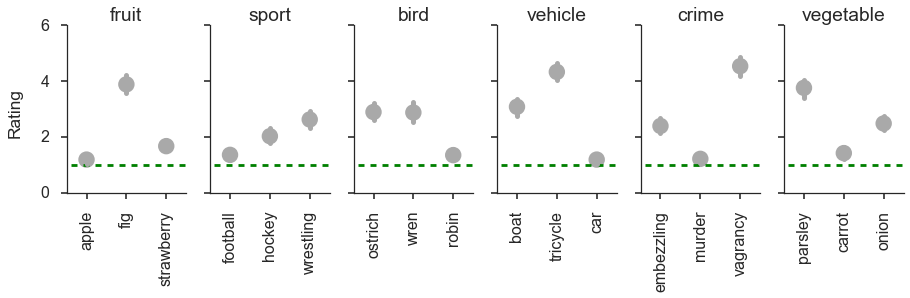

In [7]:
f, axes = plt.subplots(ncols=len(category_list), figsize=(15, 3), sharey=True)
plt.locator_params(nbins=5)
first = True

for ax, category in zip(axes, category_list):
    ax.hlines(y=1, xmin=-1, xmax=4, linestyles='dashed', colors='green')
    g = sns.pointplot(x='item', y='rating', ax=ax, jitter=True, alpha=.4, 
                      ci=95, palette=['darkgray'],
                      data=df.loc[df.category == category])
    g.set_title(category)
    g.set_ylabel('')
    g.set_xlabel('')
    g.set_xticklabels(df.loc[df.category == category].item.unique(), rotation=90)
    
f.text(0.07, 0.5, 'Rating', va='center', rotation='vertical', fontsize='xx-large')
sns.despine()

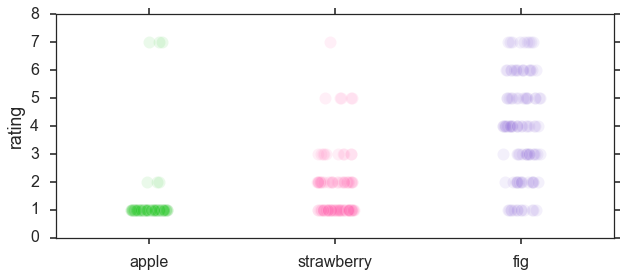

In [8]:
f, ax = plt.subplots(ncols=1, figsize=(10, 4), sharey=True)
g = sns.stripplot(x='item', y='rating', jitter=True, alpha=.1, size=12, linewidth=1,
                  data=df.loc[df.category == 'fruit'], 
                  order=['apple', 'strawberry', 'fig'],
                  palette=['limegreen', 'hotpink', 'mediumpurple'], ax=ax)
g.set_xlabel('')

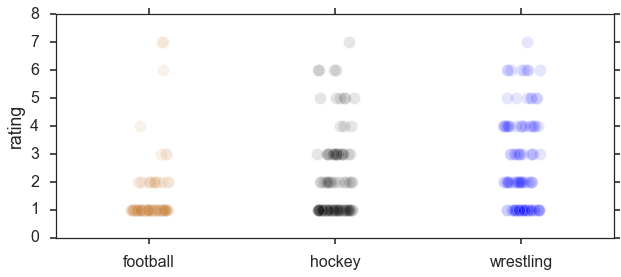

In [9]:
f, ax = plt.subplots(ncols=1, figsize=(10, 4), sharey=True)
g = sns.stripplot(x='item', y='rating', jitter=True, alpha=.1, size=12, linewidth=1,
                  data=df.loc[df.category == 'sport'], 
                  order=['football', 'hockey', 'wrestling'],
                  palette=['peru', 'black', 'blue'], ax=ax)
g.set_xlabel('')

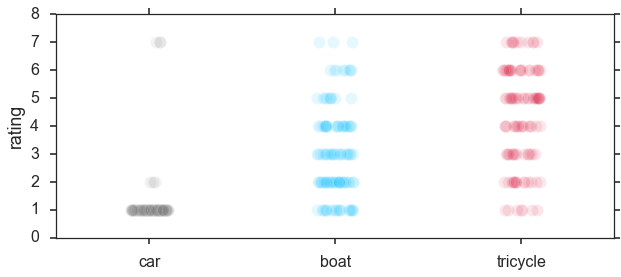

In [10]:
f, ax = plt.subplots(ncols=1, figsize=(10, 4), sharey=True)
g = sns.stripplot(x='item', y='rating', jitter=True, alpha=.1, size=12, linewidth=1,
                  data=df.loc[df.category == 'vehicle'], 
                  order=['car', 'boat', 'tricycle'],
                  palette=['gray', 'deepskyblue', 'crimson'], ax=ax)
g.set_xlabel('')